<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [1]:


#--- prereqs:  for using in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:


#--- Note:  NOT REQD when running in Google Colab!
#--- prereqs:  per prework reqs
#--- UC1:  try - no change from base config ... success
#--- UC2:  try - changes per reqs.txt ... partial success
#!pip install ipython==8.4.0               #--- 8.4.0 incompatible;  
!pip install matplotlib==3.5.2
!pip install numpy<1.23.0                  #--- 1.23.1 incompatible;  <1.23.0 reqd
!pip install pandas==1.4.3                 #--- 1.4.3 installed;  1.3.5 replaced
!pip install scikit_learn==1.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.3 MB 5.1 MB/s 
     |████████████████████████████████| 965 kB 27.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


/bin/bash: 1.23.0: No such file or directory
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.7 MB 5.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 36.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
import numpy as np      
import pandas as pd     

import matplotlib.pyplot as plt  

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:


#--- load in the csv
kstrPath = '/content/drive/MyDrive/Colab Notebooks/fourthbrain.ai/week8_unsupervisedML/'
kstrFile = kstrPath + 'dat/past.csv.gz'
df_past = pd.read_csv(kstrFile, compression='gzip')
past = df_past


In [4]:


#--- INSPECT:
past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

In [5]:
past.head(10)

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
0,5866936,5.618978e+08,1.333333,1.333333,5.550000e+03,15.84000,15.84000,0.000000,1.333333,0.000000,...,0.000000,0.000000,0.0,0.666667,0.333333,0.000000,0.000000,0,0.00,1.000000
1,5647110,5.326529e+08,2.250000,1.500000,2.755650e+04,5.80000,5.56500,1.250000,0.250000,0.250000,...,0.250000,0.750000,0.0,0.000000,0.250000,0.000000,0.000000,0,0.00,1.000000
2,5790472,4.578109e+08,1.000000,1.000000,0.000000e+00,6.27250,6.27250,0.250000,0.750000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.750000,0.250000,0.000000,0,0.00,1.000000
3,5811598,4.612641e+08,1.500000,1.500000,1.315325e+05,5.56000,5.56000,0.250000,1.000000,0.250000,...,0.250000,0.000000,0.0,0.000000,0.500000,0.000000,0.250000,0,0.25,1.000000
4,5846363,5.157993e+08,1.875000,1.375000,1.105588e+04,4.08625,4.08625,0.500000,1.000000,0.250000,...,0.250000,0.375000,0.0,0.125000,0.250000,0.250000,0.000000,1,0.00,1.000000
5,5826406,5.040005e+08,4.000000,3.333333,1.016038e+06,5.56000,5.50000,0.333333,2.666667,0.666667,...,0.333333,0.333333,0.0,0.333333,0.333333,0.000000,0.000000,0,0.00,0.666667
6,5550698,5.744890e+08,1.454545,1.090909,5.469909e+03,4.41000,4.41000,0.272727,0.909091,0.090909,...,0.272727,0.181818,0.0,0.181818,0.454545,0.090909,0.090909,1,0.00,1.000000
7,5787920,4.994029e+08,1.000000,1.000000,0.000000e+00,4.76000,4.76000,0.500000,0.000000,0.500000,...,0.000000,0.000000,0.0,0.500000,0.500000,0.000000,0.000000,0,0.00,1.000000
8,5824146,3.815759e+08,2.800000,1.600000,1.725962e+05,4.88800,4.77600,1.000000,0.800000,0.800000,...,0.000000,0.200000,0.0,0.400000,0.400000,0.000000,0.000000,1,0.00,1.600000
9,5695916,5.929000e+08,1.000000,1.000000,0.000000e+00,1.43000,1.43000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0,0.00,1.000000


2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [6]:


#--- INSPECT:  Do people buy what they look at or windows shop?
#A:  mainly window shopping


#--- INSPECT:   is the data balanced?
#It is imbalanced by 34:66, purchased:notPurchased


#--- INSPECT:  num of interactions(rows) that resulted in purchase
#--- Q:  what % of interactions (rows) resulted in a purchase?
pctPurch = past["Purchased?"].mean() * 100
print(f"percent of rows resulting in purchase: {pctPurch:.3f}%")

percent of rows resulting in purchase: 34.380%


In [8]:


#--- INSPECT:  reformat output to show non-scientific to 3 decimals
past.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,...,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,5573727.198,523528645.677,1.951,1.327,249023.399,7.458,7.426,0.542,0.894,0.414,...,0.170,0.213,0.066,0.163,0.244,0.169,0.086,0.344,0.059,1.144
std,1161839.642,59987021.814,1.325,0.718,692038.163,11.883,11.876,0.565,0.841,0.772,...,0.256,0.276,0.173,0.246,0.289,0.252,0.191,0.475,0.154,0.438
min,4104.000,65241811.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5760491.250,499849751.365,1.000,1.000,0.000,2.484,2.480,0.000,0.500,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,5830816.000,534373473.583,1.750,1.167,3626.375,4.441,4.440,0.500,1.000,0.222,...,0.000,0.143,0.000,0.000,0.182,0.000,0.000,0.000,0.000,1.000
75%,5875312.000,561684345.250,2.308,1.500,207199.326,7.620,7.550,0.859,1.000,0.633,...,0.250,0.333,0.040,0.250,0.364,0.250,0.091,1.000,0.042,1.046
max,5932538.000,622026195.000,40.000,28.000,10875369.000,236.510,236.510,12.000,28.000,38.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,4.000


3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [9]:


#--- ASSUMED:  we care about any purchase by anyone;  dont care about productId or userId
X = past.drop(columns=['product_id', 'user_id'])
y = X.pop('Purchased?')

In [10]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [11]:


#--- Apply Principal Component Analysis ...
#--- preprocess:  split data into test/train?  Assume no;  we will load another data file for the new products


#--- preprocess:  feature scaling/normalization
#--- note:  PCA is more conducive to Standard Scaling and not Min Max Scaling
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler().fit(X)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_reduced = scaler.transform(X)


In [12]:


from sklearn.decomposition import PCA

#--- apply PCA
#pca = PCA(n_components=5, whiten=True)            #--- note:  per research, whitenining is more appropriate for image clustering
pca = PCA(n_components=5)

pca.fit(X_reduced)
X_reduced = pca.transform(X_reduced)

X_reduced


array([[ 0.56543411, -1.68893905,  1.05964357,  0.04186045,  0.45659675],
       [ 0.45452269,  0.00821172, -0.61879624,  0.21569295,  0.66453298],
       [-0.16158519, -1.15208509, -0.4421031 , -0.34662312, -1.23452532],
       ...,
       [ 2.13166251, -2.37323062, -1.03075866, -0.63324189,  1.14970733],
       [ 2.46816405, -1.94687513, -0.96801235,  0.30258579,  2.24621613],
       [-2.43546037,  0.35421394,  0.11561305, -0.41762179,  0.44326668]])

In [13]:
X_reduced.shape

(5000, 5)

In [14]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [15]:


#--- INSPECT:  % of variance, as explained by each selected component
print(pca.explained_variance_ratio_)

[0.10282249 0.0944566  0.0650915  0.051316   0.043042  ]


6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [16]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [17]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

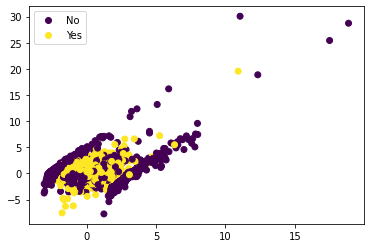

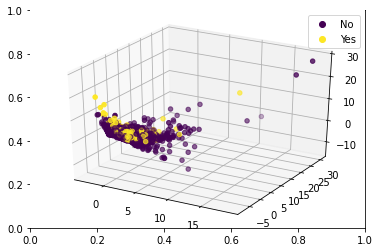

In [18]:
visualize_2pcs(X_reduced, y)
visualize_3pcs(X_reduced, y)

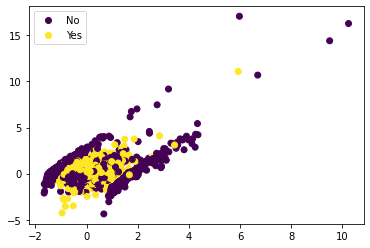

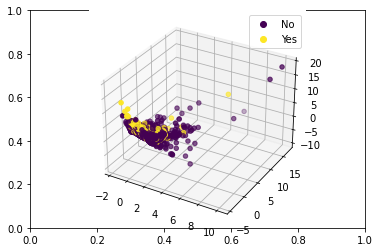

In [57]:


#--- COMPARE:  Note that this original code left in for comparison purposes only 
visualize_2pcs(X_reduced, y)
visualize_3pcs(X_reduced, y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [24]:


# YOUR CODE HERE (imports!)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


def train(X, y, standardize = True) -> None:
    # YOUR CODE HERE
    #--- split data into train, and test;  set random state = 0
    x_train, x_test, y_train, y_test = \
            train_test_split(X, y, train_size=0.8, random_state=0)
    scaler = StandardScaler()                                                             #--- use standard scaler, serves pca better 
    #logistic = LogisticRegression(max_iter=10000, tol=0.1, class_weight='balanced')       #--- we have an imbalanced data set
    logistic = LogisticRegression(max_iter=10000, tol=0.01, class_weight='balanced')       
    #logistic = LogisticRegression()                                                       

    if standardize:
      model = Pipeline(steps=[("scaler", scaler), ("model", logistic)])
    else:
      model = Pipeline(steps=[("model", logistic)])

    

    #--- build a pipeline;  preprocess the data to optionally standardize
    #--- build a pipeline to apply logistic regression;  are labels balanced?
    #--- fit the pipeline using training data
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    #--- print the classification report 
    print(classification_report(y_test, y_pred))



Now apply the pipeline on the all the features `X` and review the performance

In [25]:


#--- apply the pipeline to the features X
#--- 0-f1; 1-f1; weighted avg f1:  0.77; 0.17;  0.56  (unbalanced-fullDataset)
#--- 0-f1; 1-f1; weighted avg f1:  0.76; 0.54;  0.68  (balanced-fullDataset)
model = train(X, y, standardize=True)


              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [26]:


#--- apply the pipeline to the reduced feature set
#--- Note:  we are not applying standardization to the reduced set;  the reduced set already had a standardScaler applied, so this would be either pointless or damaging
#--- 0-f1; 1-f1; weighted avg f1:  0.77; 0.01;  0.50  (unbalanced-reducedDataset)
#--- 0-f1; 1-f1; weighted avg f1:  0.73; 0.52;  0.65  (balanced-reducedDataset)
model_reduced = train(X_reduced, y, standardize=False)

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       649
           1       0.50      0.54      0.52       351

    accuracy                           0.65      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.66      0.65      0.65      1000



In [ ]:


#--- COMPARE:  this original notebook code left here for comparison purposes only

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       649
           1       0.49      0.54      0.51       351

    accuracy                           0.64      1000
   macro avg       0.61      0.62      0.62      1000
weighted avg       0.65      0.64      0.65      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 


    *YOUR ANSWER HERE*
The results are quite good.  PCA is designed to extract and identify the key features so to get the level of accuracy and performance with only 5 features versus 34 is very good.


## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [27]:


#--- prereq import for kMEans
from sklearn.cluster import KMeans


2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [41]:


#--- function for elbow curve
def visualize_elbow(X, ks):
    fig, ax = plt.subplots(figsize=(10, 10))                                #--- use figsize to increase the plot size to better inspect the inflections
    inertias = []
    for k in ks:
        # YOUR CODE HERE
        #kmeans = KMeans(n_clusters=k, random_state=10)                      #--- , init="k-means++" (default);  elbow barely levels out at clusters=8
        kmeans = KMeans(n_clusters=k, random_state=10, init="random")       #--- , init="random" (default);  elbow barely levels out at clusters=8 (no change)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

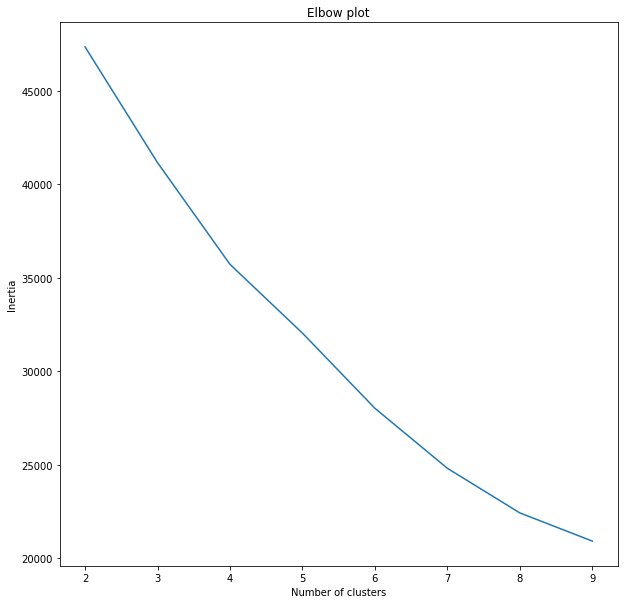

In [42]:


#--- visualize for clusters between 2 and 9 (non-inclusive)
visualize_elbow(X_reduced, range(2, 10))


#--- A:  the optimal number of clusters is the lowest inertia for the least clusters;  clusters= 8

4. What are the disadvantage to use the Elbow method? 

    *YOUR ANSWER HERE*

    The visible disadvatage to using the elbow method is that there is quite a bit of interpretability, as well as challenge to visually determine inflection points.  Scaling the plot size helps tosome degree.

    There is an element of subjectivity to this method.  Although we can observe loss is decreasing, it is not clear as to why.


5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [43]:


#--- WORKAROUND:  the custom library is on Google Drive;  we need to load it in 
import sys
sys.path.append(kstrPath + 'nb/')


In [44]:

#--- VERIFY
print(kstrPath + 'nb/')

/content/drive/MyDrive/Colab Notebooks/fourthbrain.ai/week8_unsupervisedML/nb/


In [45]:


#--- WORKAROUND:  the custom library is colliding with the std utils package;  rename
import cust_utils
from cust_utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.2501937188509302
For n_clusters = 3 The average silhouette_score is : 0.25809140934191366
For n_clusters = 4 The average silhouette_score is : 0.2715723350814727
For n_clusters = 5 The average silhouette_score is : 0.2981018985936342
For n_clusters = 6 The average silhouette_score is : 0.24253384780064136
For n_clusters = 7 The average silhouette_score is : 0.24808831271626872
For n_clusters = 8 The average silhouette_score is : 0.2639136571401787


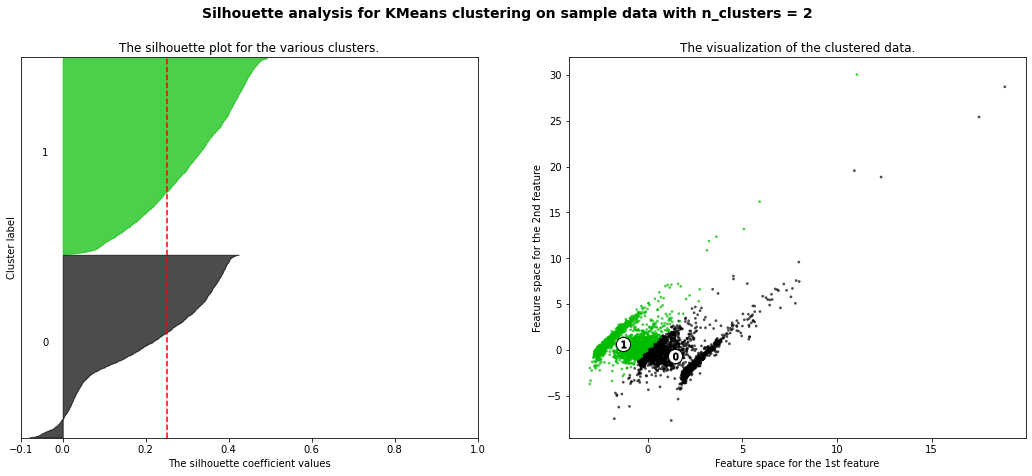

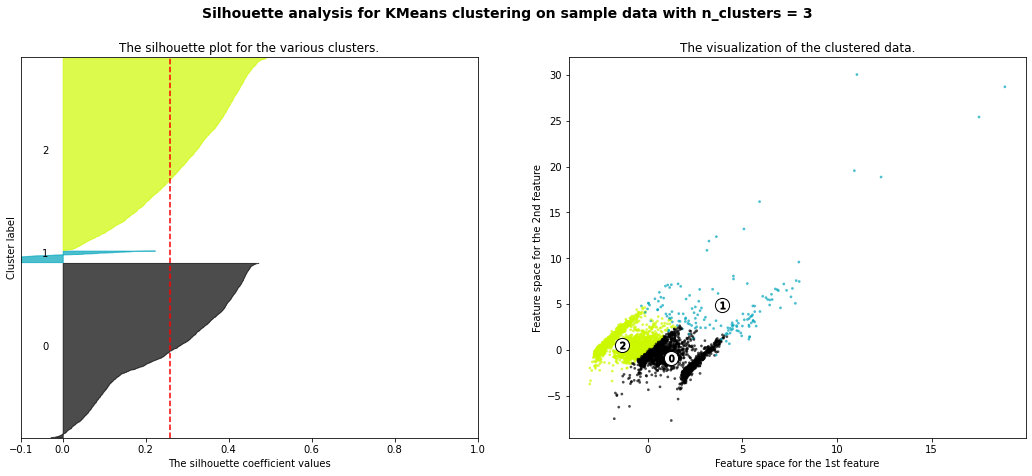

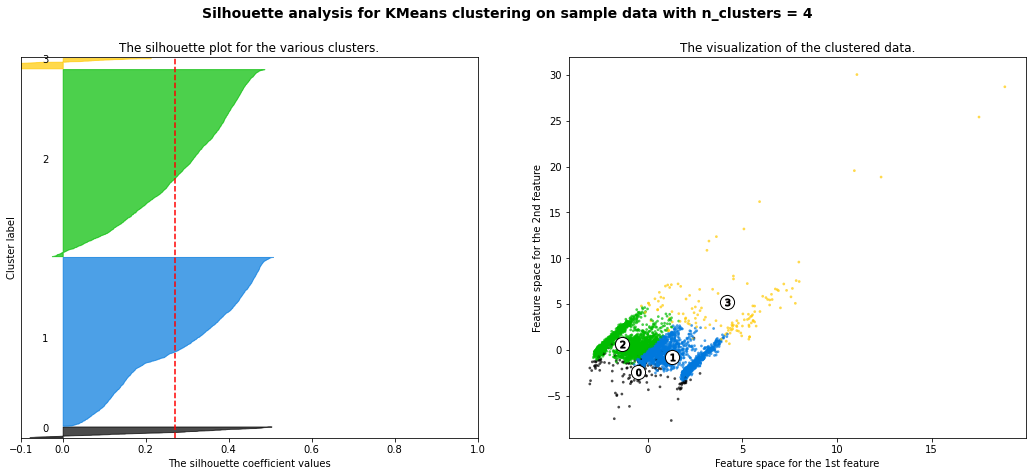

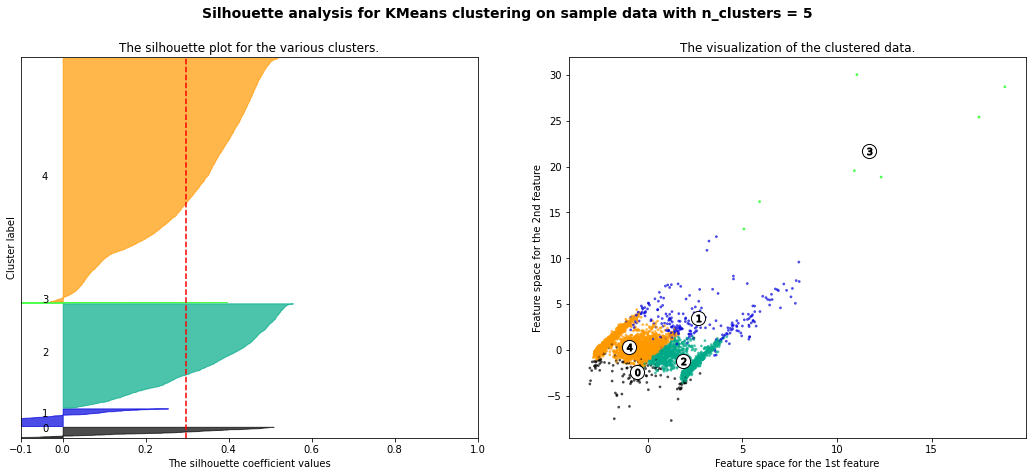

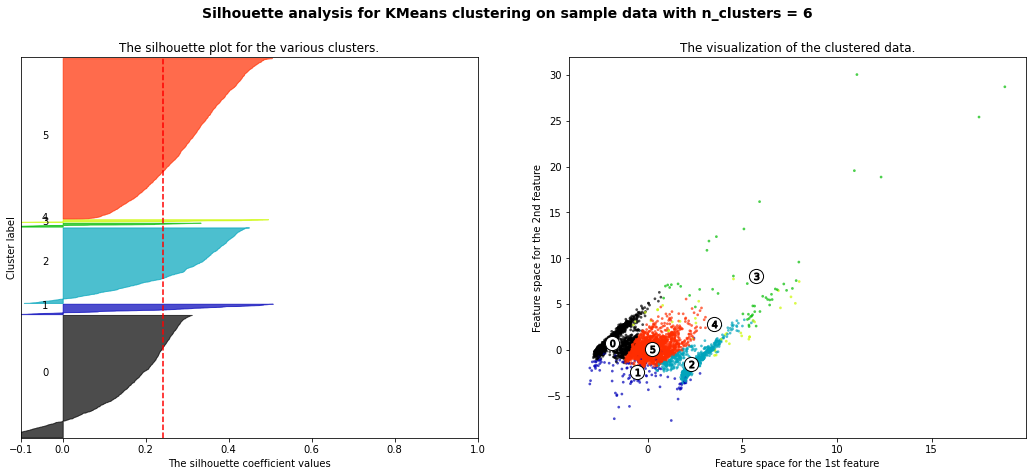

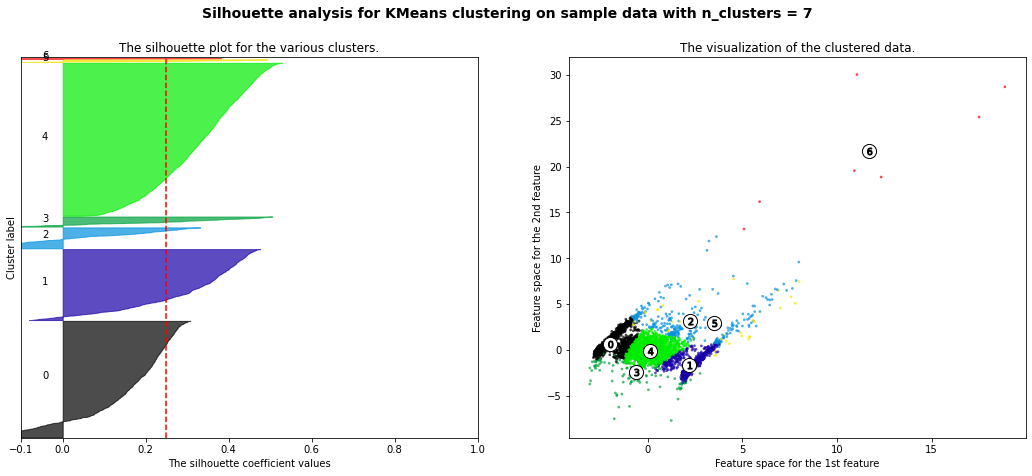

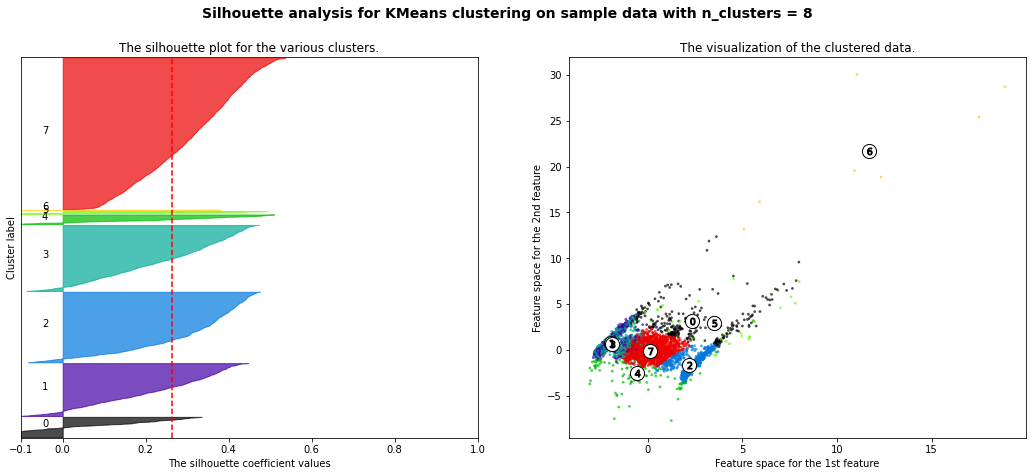

In [46]:


from pandas.core.common import random_state
# YOUR CODE HERE
visualize_silhouette(max_clusters=8, X=X_reduced, random_state=10)
#visualize_silhouette(max_clusters=8, X=X_reduced)

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [76]:


# YOUR CODE HERE
#--- OBSERVATION:  highest silhouette score is for num_clusters=5!
klng_score = 5
km = KMeans(n_clusters=klng_score, random_state=10)
km.fit(X_reduced)

print(km)

KMeans(n_clusters=5, random_state=10)


In [87]:


#--- COMPARE:  this original notebook code preserved for comparison only

KMeans(n_clusters=4, random_state=10)

7. What is the size of each cluster? 

In [77]:

#--- INSPECT:  the size of each cluster
cls_labels = km.labels_
cls_counts = np.bincount(cls_labels[cls_labels>=0])

print("Number of clusters found: ", km.n_clusters)
print("cluster count [0]", cls_counts[0])
print("cluster count [1]", cls_counts[1])
print("cluster count [2]", cls_counts[2])
print("cluster count [3]", cls_counts[3])
print("cluster count [4]", cls_counts[4])


Number of clusters found:  5
cluster count [0] 137
cluster count [1] 235
cluster count [2] 1387
cluster count [3] 7
cluster count [4] 3234


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [78]:


# YOUR CODE HERE
klngNumClusters = 5
past['cluster_pca'] = [min(range(klngNumClusters), key=lambda i, values=values: values[i]) \
                       for values in km.transform(X_reduced)]
past['cluster_pca'].value_counts()


4    3234
2    1387
1     235
0     137
3       7
Name: cluster_pca, dtype: int64

9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

    *YOUR ANSWER HERE*

  GOAL:  visualize each cluster in a bar chart.  This will identify clusters of data that have the highest relative influence on the target variable.

  From a business perspective, the higher performing clusters may help to identify key patterns of customer purchasing behaviour that result in a target purchase.  

  From these, further questions around which products are more likely to be purchased, how to better encourage these behaviours, and how to upsell can be explored.

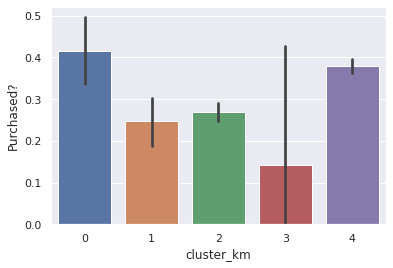

In [90]:


#--- ALG_1:  KMeans
#--- try to visualize with a barchart
import seaborn as sea
#sea.set(rc={'figure.figsize':(6,4)})

alg1 = km.fit(X_reduced)
alg1_dist = alg1.transform(X_reduced)
past['cluster_km'] = [min(range(klngNumClusters), key=lambda i, values=values: values[i]) \
                       for values in alg1_dist]

sea.barplot(data=past, x='cluster_km', y='Purchased?')

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

    *YOUR ANSWER HERE*

#--- Q:  what are the assumptions for KMeans?  Is KMeans a good approach?
KMeans transform outputs the mean distance from the cluster center.  Cluster 3 is closest fit to the cluster center.     If we refer to the average purchase% of ~34%, there are very few clusters (2) that perform higher than this, and not by a significant amount.  The clusters identified do not really reveal strong patterns of influencers for Purchase, the highest reporting a ~40% probablity of purchase.

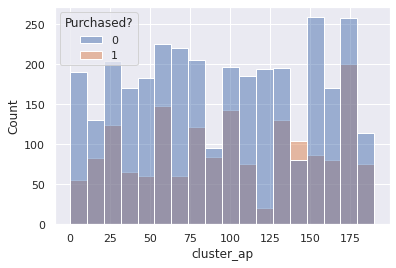

In [81]:


#--- ALG_2:  Affinity Propagation
from sklearn.cluster import AffinityPropagation
klng_score = 5
alg2 = AffinityPropagation(random_state=10)
alg2 = alg2.fit(X_reduced)

past['cluster_ap'] = alg2.predict(X_reduced)
sea.histplot(data=past, x='cluster_ap', hue='Purchased?')


#--- OBSERVE:  interesting ... we can see that all the purchased events occur within a specific cluster?
#--- Followup:  further investigation of this cluster is warranted

In [92]:


#--- PROBLEM:  could not get this to work
#--- ALG_3:  Spectral Clustering (low samples, low clusters)
from sklearn.cluster import SpectralClustering
#alg3 = SpectralClustering(n_clusters = klng_score, assign_labels='discretize', random_state=10)
alg3 = SpectralClustering(random_state=10)
alg3 = alg3.fit_predict(X_reduced)

past['cluster_sp'] = [min(range(klngNumClusters), key=lambda i, values=values: values[i]) \
                       for values in alg3]

#past['cluster_sp'] = alg3.predict(X_reduced)
sea.barplot(data=past, x='cluster_sp', y='Purchased?')

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:366: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  est = KMeans(


ValueError: ignored

11. Jot down recommendations or followup steps, detailing the reasons.

    *YOUR ANSWER HERE*

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [96]:


# YOUR CODE HERE
kstrNew = kstrPath + 'dat/new.csv.gz'
df_new = pd.read_csv(kstrNew, compression='gzip')
new = df_new

In [97]:
new.shape

(30091, 5)

In [98]:

#--- NOTE:  the file contains only 30091 rows;  why are we expecting 5000 more rows later on?!
assert new.shape == (30091, 5)

In [99]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

        *YOUR ANSWER HERE*

The test data has 6 times more data points than the training dataframe.

The test data contains only four features (plus target) compared to the training set.  

It is possible that the test set has had PCA performed on it already

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [111]:


# YOUR CODE HERE
serPast = past['product_id'].unique()
serNew = new['product_id'].unique()

serMatch = set(serPast).intersection(serNew)

lngNumMatch = len(serMatch)
print("Number of product ids in both past and new data: ", lngNumMatch)

#--- NOTE:  there are no product id i both the test and training data sets
#--- INSPECT:  this is a good thing; we have no leakage between train and test

Number of product ids in both past and new data:  0


4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [113]:


# YOUR CODE HERE # ~.344
#--- % of data points that resulted in a purchase ...
pctPurch = new['Purchased?'].mean()
print("Percentage of dtaa points that resulted in a purchase:  ", pctPurch)

Percentage of dtaa points that resulted in a purchase:   0.3442557575354757


5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [114]:


# YOUR CODE HERE
#--- split the train/test data
X_train, X_test, y_train, y_test = train_test_split( \
                          new.drop(columns=['Purchased?', 'product_id']), \
                          new['Purchased?'], train_size=0.8)

#--- convert to ndarrays
X_train, X_test, y_train, y_test = X_train.to_numpy(), \
                                  X_test.to_numpy(), \
                                  y_train.to_numpy(), \
                                  y_test.to_numpy()

In [115]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [116]:


#--- fit a simple logistic regression
logistic = LogisticRegression()

pipeline = Pipeline(steps=[("model", logistic)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

#--- print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78      3929
           1       0.45      0.06      0.11      2090

    accuracy                           0.65      6019
   macro avg       0.55      0.51      0.44      6019
weighted avg       0.58      0.65      0.55      6019



In [ ]:
# YOUR CODE HERE
#--- VERIFY:  this code left here for results comparison
 

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [117]:


# YOUR CODE HERE
X = np.concatenate((X_train, X_test), axis=0)
X.shape


(30091, 3)

In [118]:
X_train.shape

(24072, 3)

In [119]:
X_test.shape

(6019, 3)

In [ ]:


#--- ERROR:  I am missing 5000 rows!
#--- X_train + x_test = 30091
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [120]:


# YOUR CODE HERE
y_test_dummy = pd.Series([-1] * len(X_test)).to_numpy()
y = np.concatenate((y_train, y_test_dummy))

In [121]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [122]:

#--- YOUR CODE HERE
from sklearn.semi_supervised import LabelSpreading
model = LabelSpreading(kernel='knn', alpha=0.01)
model.fit(X, y)

LabelSpreading(alpha=0.01, kernel='knn')

In [ ]:


#--- VERIFY:  this code retained for results comparison


LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [123]:


len(model.transduction_)

30091

In [124]:


#--- get the values that correspond to X_test; from lngIdxStart to the End of the array
lngIdxStart = len(X_train)
semi_sup_preds = model.transduction_[lngIdxStart:]

In [125]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [126]:


#--- semi-supervised learning
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3929
           1       0.84      0.70      0.77      2090

    accuracy                           0.85      6019
   macro avg       0.85      0.82      0.83      6019
weighted avg       0.85      0.85      0.85      6019



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [127]:


#--- supervised learning
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78      3929
           1       0.45      0.06      0.11      2090

    accuracy                           0.65      6019
   macro avg       0.55      0.51      0.44      6019
weighted avg       0.58      0.65      0.55      6019



    *YOUR ANSWER HERE*

The results for semi supervised learning were a big improvement to accuracy, precision, recall and f1.    One obvious comparison is the comparitive volume of data available.  

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)